In [1]:
# Machine Learning Model 
# LSTM
# Train Data
# x_train lat,lon,distance,speed,time diff
# y_train pred_lat,pred_lon

# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt




In [2]:
# for kaggle!!--------------------------------
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# end for kaggle!!------------------------------


df = pd.read_csv('DataSet.csv')

In [3]:
train_x = df[['Global_Time','Global_X','Global_Y','v_Vel','v_Acc']]
train_y=df[['Pred_X','Pred_Y']]

In [4]:

print(train_x.tail(3))


print(train_y.tail(3))

      Global_Time     Global_X     Global_Y  v_Vel  v_Acc
2414         2414  679947.6212  419871.2260  27.69    0.0
2415         2415  679947.4313  419872.0486  27.69    0.0
2416         2416  679947.2414  419872.8710  27.69    0.0
           Pred_X       Pred_Y
2414  679947.4313  419872.0486
2415  679947.2414  419872.8710
2416  679947.2414  419872.8710


In [5]:
import numpy as np
# convert pandas dataframe to numpy array

x_data = train_x.values
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
x_data.shape

(2417, 5)

In [6]:
y_data = train_y.values
y_data.shape

(2417, 2)

In [7]:
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data[].reshape(x_data.shape[0],5)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(2417,5,1)

print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)



new_y_data = sc.fit_transform(y_data)

print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)


X_data shape : (2417, 5)
new X_data shape : (2417, 5, 1)
y_data shape : (2417, 2)
new y_data shape : (2417, 2)


In [ ]:
# new_x_data.reshape(new_x_data.shape[0],5,1)


In [ ]:
# for inversing transform


new_df.reshape(2417,5)
new_df = sc.inverse_transform(new_df)
new_df.reshape(new_df.shape[0],5,1)


In [9]:
import tensorflow as tf



from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split




In [10]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.33, random_state=42)



In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1619, 5, 1)
(1619, 2)
(798, 5, 1)
(798, 2)


In [12]:
model = Sequential()

# first layer
model.add(LSTM(units=50, batch_input_shape=(None,5,1),return_sequences=True))
model.add(Dropout(0.2))

# second layer
# model.add(Dense(128, 1))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

# third layer
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

# fourth dense layer
model.add(Dense(units=2))


model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()
          

'''
LSTM层的units数：增加units数可以增加模型的表达能力，但也会增加模型的复杂度和训练时间。因此，可以尝试不同的units数并找到一个合适的值。

Dropout层的比率：增加Dropout比率可以减少过拟合的风险，但过高的Dropout比率会影响模型的性能。因此，可以尝试不同的Dropout比率并找到一个合适的值。

学习率(learning rate)：Adam优化器默认的学习率通常可以正常工作，但有时候需要手动调整学习率以加速或稳定训练过程。

批量大小(batch size)：批量大小会影响模型的训练速度和内存占用情况。通常情况下，使用大批量大小可以加快训练速度，但也会占用更多的内存。

训练轮数(epochs)：增加训练轮数可以提高模型的精度，但也会增加训练时间。可以使用早停法(early stopping)等技术来提高模型的训练效率。
'''


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 100)            60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

In [13]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
51/51 [==============================] - 7s 25ms/step - loss: 0.3427 - accuracy: 0.7060 - val_loss: 0.1161 - val_accuracy: 0.7707
Epoch 2/200
51/51 [==============================] - 1s 11ms/step - loss: 0.1290 - accuracy: 0.7338 - val_loss: 0.0925 - val_accuracy: 0.7594
Epoch 3/200
51/51 [==============================] - 1s 11ms/step - loss: 0.1216 - accuracy: 0.7486 - val_loss: 0.0942 - val_accuracy: 0.8208
Epoch 4/200
51/51 [==============================] - 1s 10ms/step - loss: 0.1217 - accuracy: 0.7245 - val_loss: 0.0962 - val_accuracy: 0.8371
Epoch 5/200
51/51 [==============================] - 1s 10ms/step - loss: 0.1189 - accuracy: 0.7221 - val_loss: 0.0850 - val_accuracy: 0.7193
Epoch 6/200
51/51 [==============================] - 1s 12ms/step - loss: 0.1167 - accuracy: 0.7344 - val_loss: 0.0845 - val_accuracy: 0.6454
Epoch 7/200
51/51 [==============================] - 1s 11ms/step - loss: 0.1109 - accuracy: 0.7690 - val_loss: 0.0849 - val_accuracy: 0.9449
Epoch 

In [14]:
model.save('D:/浏览器下载/EDGE下载/LSTM_2ndtrail/model.h5')
# model.save(args["model"])

In [15]:
from tensorflow.python.keras.models import load_model
model1 = load_model('D:/浏览器下载/EDGE下载/LSTM_2ndtrail/model.h5')

In [16]:
result = model1.predict(x_test)
result

array([[-0.9801821 , -0.94409645],
       [-0.98440915, -0.9519472 ],
       [ 0.93109614,  0.21914783],
       ...,
       [ 0.7608953 ,  0.91113627],
       [-0.9792937 , -0.9430573 ],
       [-0.70052385, -0.40942022]], dtype=float32)

In [17]:

res_df = sc.inverse_transform(result)
# res_df.reshape(new_df.shape[0],5,1)
res_df


array([[679865.44, 419300.62],
       [679865.2 , 419298.28],
       [679960.8 , 419643.03],
       ...,
       [679952.4 , 419846.72],
       [679865.44, 419300.9 ],
       [679879.4 , 419458.  ]], dtype=float32)

In [18]:
y_test_actual=sc.inverse_transform(y_test)
print(y_test_actual)
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()



[[679865.2453 419295.482 ]
 [679865.028  419294.7702]
 [679956.5725 419615.6865]
 ...
 [679950.2281 419859.8091]
 [679865.2721 419295.5697]
 [679879.1503 419456.9592]]


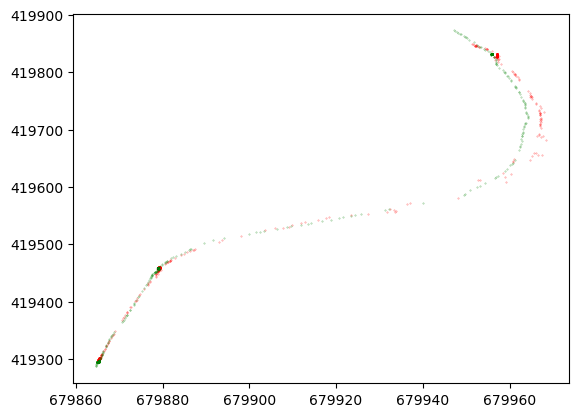

In [19]:
# 绘制预测值和实际值

predicted_df = pd.DataFrame(data=res_df[0:,0:],index=[i for i in range(res_df.shape[0])],columns=['f'+str(i) for i in range(res_df.shape[1])])

actual_df = pd.DataFrame(data=y_test_actual[0:,0:],index=[i for i in range(y_test_actual.shape[0])],columns=['f'+str(i) for i in range(y_test_actual.shape[1])])

# for i in range(len(res_df)):
# #   print(i)
plt.scatter(x=predicted_df['f0'],y=predicted_df['f1'],c='r',s=0.1,alpha=0.5)
plt.scatter(x=actual_df['f0'],y=actual_df['f1'],c='g',s=0.1,alpha=0.5)

plt.show()

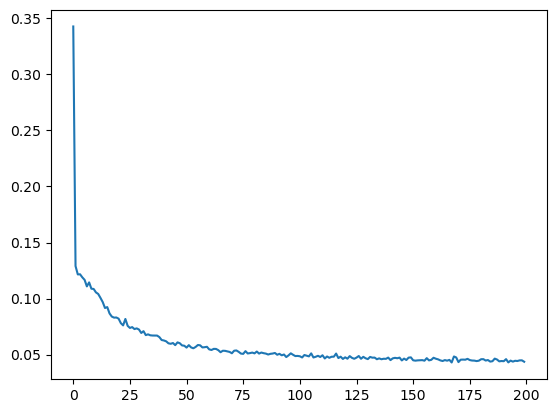

In [20]:
plt.plot(history.history['loss'])
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # 定义真实定位数据和预测数据
# true_pos = np.array([[1, 2], [3, 4], [5, 6]])
# pred_pos = np.array([[0.5, 1.5], [3.2, 3.9], [4.9, 6.2]])

# 计算均方误差
mse = mean_squared_error(actual_df, predicted_df)
print("MSE:", mse)

# 计算平均绝对误差
mae = mean_absolute_error(actual_df, predicted_df)
print("MAE:", mae)

# 计算相关系数矩阵
corr_matrix = np.corrcoef(actual_df.T, predicted_df.T)
corr_coefficient = corr_matrix[0, 1] # 取出相关系数值
print("相关系数为：", corr_coefficient) # 打印相关系数
# 计算决定系数
r2 = r2_score(actual_df, predicted_df)
print("R^2:", r2)

import numpy as np

# 将实际值和预测值分别存储在矩阵中
actual_matrix = np.array(actual_df)
predicted_matrix = np.array(predicted_df)
correlation_matrix = np.corrcoef(actual_matrix, predicted_matrix, rowvar=False) # 计算相关系数（Pearson相关系数）
correlation_coefficient = correlation_matrix[0, 1] # 提取相关系数矩阵中的相关系数
print("Correlation coefficient:", correlation_coefficient) # 打印相关系数



MSE: 20.148381402911415
MAE: 2.352782957389579
相关系数为： 0.9609421963731279
R^2: 0.9985616449504419
Correlation coefficient: 0.9609421963731279
